In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Importing data, droping unimportant deatures, feature scalling.

In [2]:
train_data = pd.read_csv("kc_house_data.csv")
Y_train = train_data['price'].to_numpy()/1000000
# droping the unnecessarry features
train_data = train_data.drop(['id', 'date', 'zipcode', 'lat', 'long', 'price'], axis=1)
rows = len(train_data.axes[0])
cols = len(train_data.axes[1])
n = cols
m = rows

# initiallizing the np array
X_train = np.zeros((rows, cols))

# Feature Scalling
for i in range(cols):
    cmin = train_data.iloc[:, i].min()
    cmax = train_data.iloc[:, i].max()
    col_mean = train_data.iloc[:, i].sum()/m
    X_train[:,i] = (train_data.iloc[:, i]-col_mean)/(cmax-cmin)

Building the Gradient Descent algorithm

In [1]:
def cost_function(X, Y, w, b):
    """Calculates the cost function

    Args:
        X (np.array): Input data
        Y (np.array): Correct output data
        w (np.array): w vector
        b (Number): b parameter

    Returns:
        Number: Returns cost
    """
    s = 0
    for i in range(m):
        f_wb = np.dot(w, X[i]) + b
        s += (f_wb - Y[i])**2
    cost = s/(2*m)
    
    return cost

def compute_gradient(X, Y, w, b):
    """Computes the gradient of cost function at w and b

    Args:
        x (np.array): Training inputs
        y (np.array): Training oupts (Correct answers)
        w (np.array): w vector
        b (Number): b parameter

    Returns:
        np.array, Number: dj_dw and dj_db
    """   
    dj_dw = np.zeros(n)
    dj_db = 0
    for j in range(n):
        t = 0
        for i in range(m):
            f_wb = np.dot(w, X[i]) + b
            er = f_wb - Y[i]
            t += er*X[i][j]
            if(j == 0):
                dj_db += er
        dj_dw[j] = t/m
    dj_db = dj_db/m
          
    return dj_dw, dj_db

def GD_algorithm(X, Y, alpha):
    """Calculates the best fit for the model f_w,b(X) = w*X + b for the given data and learning rate

    Args:
        x (np.array): Inputs of training data
        y (np.array): Correct key of output data
        alpha (Number): Learning Rate

    Returns:
        w, b, J_history: Parameters and Cost function history for Learning Curve
    """   
    J_history = []
    w = np.zeros(n)
    b = 0.0
    prev_J = cost_function(X, Y, w, b)
    iterations = 0
    
    while(True):
        iterations += 1
        dj_dw, dj_db = compute_gradient(X, Y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        curr_J = cost_function(X, Y, w, b)
        
        J_history.append(curr_J)
        # print(f"J: {curr_J}")
        if(curr_J > prev_J):
            print(f"The value of alpha: {alpha} is too large, try a smaller value.")
            break
        if(prev_J-curr_J < 0.000001):
            return w, b, J_history, iterations
        
        prev_J = curr_J
        
def predict(X, w, b):
    """Predicts the data based on the input parameters

    Args:
        x (np.array): Inputs
        w (np.array): w vector
        b (Number): b parameter

    Returns:
        np.array: Predictions
    """
    Y_pred = []   
    m = len(X)
    
    for i in range(m):
        Y_pred.append(np.dot(w, X[i]) + b)
        
    return Y_pred

Implementation of Gradient Descent algorithm

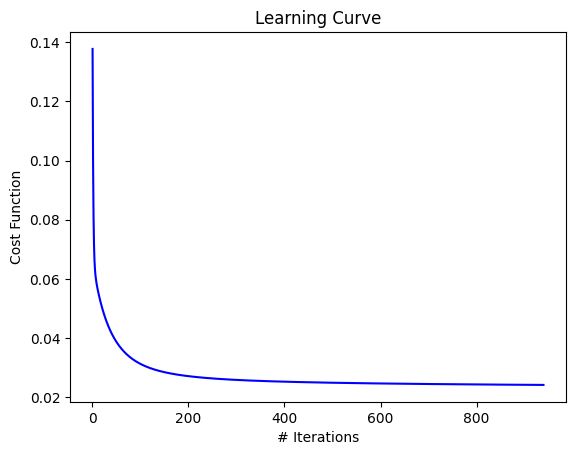

In [4]:
alpha = 0.3
w, b, J_history, iterations = GD_algorithm(X_train, Y_train, alpha)

# Plotting Learning Curve
s = len(J_history)
indices = []
for i in range(1, s+1):
    indices.append(i+iterations-s)
plt.plot(indices, J_history, c='b')
plt.xlabel("# Iterations")
plt.ylabel("Cost Function")
plt.title("Learning Curve")
plt.show()

In [5]:
Y_pred = predict(X_train, w, b)
print(f"The accuracy of the regression model is {r2_score(Y_train, Y_pred)}")

The accuracy of the regression model is 0.6407075151635049
